Using TensorFlow backend.


(50000, 28, 28) (50000,)


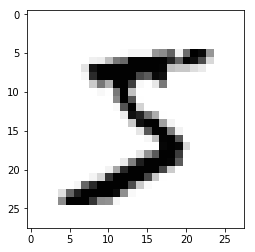

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
print(X_train[0].shape)
print(y_train[:5])

(28, 28)
[5 0 4 1 9]


In [3]:
import tensorflow as tf
print(tf.__version__)
tf.reset_default_graph()
s = tf.InteractiveSession()

1.2.1


In [4]:
input_X = tf.placeholder('float32', [None, 784])
input_y = tf.placeholder('int64', [None])

In [5]:
W1 = tf.Variable(tf.random_normal([784, 128], stddev = 0.01))
b1 = tf.Variable(tf.zeros([128]))
W2 = tf.Variable(tf.random_normal([128, 10], stddev = 0.01))
b2 = tf.Variable(tf.zeros([10]))

In [6]:
dense = tf.nn.relu6(tf.matmul(input_X, W1) + b1)
output = tf.matmul(dense, W2) + b2
predicted_y = tf.squeeze(tf.argmax(output, 1))
acc = tf.reduce_mean(tf.cast(tf.equal(predicted_y, input_y), "float"))

loss = tf.losses.sparse_softmax_cross_entropy(input_y, output)
optimizer = tf.train.AdamOptimizer().minimize(loss)

[2 6 7 1 8]
[5 0 4 1 9]


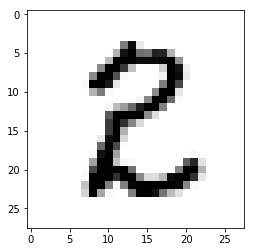

In [7]:
import numpy as np
r = np.random.permutation(len(y_train))
X_train_batch = X_train[r,:,:]
y_train_batch = y_train[r]
print(y_train_batch[:5])
print(y_train[:5])
plt.imshow(X_train_batch[0], cmap="Greys")

In [8]:
def batch_generator(xs,ys, batch_size=32):
    batch_x = []
    batch_y = []
    for x, y in zip(xs, ys):
        batch_x.append(x)
        batch_y.append(y)
        if len(batch_x) == batch_size:
            yield batch_x, batch_y
            batch_x, batch_y = [], []
    #yield batch_x, batch_y

32
3


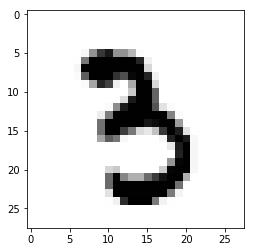

In [9]:
x, y = list(batch_generator(X_train_batch, y_train_batch))[-1]
print(len(y))
print(y[-1])
plt.imshow(x[-1], cmap="Greys")

In [12]:
epochs = 20
batch_size = 32
train_accs, val_accs, train_losses, val_losses = [], [], [], []
s.run(tf.global_variables_initializer())

for epoch in range(epochs):
    r = np.random.permutation(len(y_train))
    X_train_batch = X_train[r,:,:]
    y_train_batch = y_train[r]
    for batch_x, batch_y in batch_generator(X_train_batch, y_train_batch, batch_size):
        batch_x = np.asarray(batch_x).reshape([batch_size, 784])
        s.run(optimizer, {input_X: batch_x, input_y: batch_y})
        #loss_i = s.run(loss, {input_X: batch_x, input_y: batch_y})
    #print("loss at iter %i:%.4f" % (epoch, loss_i))
    #print("train acc:", s.run(acc, {input_X: batch_x, input_y: batch_y}))
    #print("test acc:", s.run(acc, {input_X: X_val.reshape([-1, 784]), input_y: y_val}))
    
    train_loss = s.run(loss, {input_X: X_train.reshape([-1, 784]), input_y: y_train})
    print("train_loss at iter %i :%.4f" % (epoch, train_loss))
    val_loss = s.run(loss, {input_X: X_val.reshape([-1, 784]), input_y: y_val})
    print("val_loss at iter %i :%.4f" % (epoch, val_loss))
    train_acc = s.run(acc, {input_X: X_train.reshape([-1, 784]), input_y: y_train})
    print("train acc:", train_acc)
    val_acc = s.run(acc, {input_X: X_val.reshape([-1, 784]), input_y: y_val})
    print("val acc:", val_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

train_loss at iter 0 :0.1910
val_loss at iter 0 :0.1877
train acc: 0.9436
val acc: 0.9471
train_loss at iter 1 :0.1137
val_loss at iter 1 :0.1246
train acc: 0.9683
val acc: 0.9657
train_loss at iter 2 :0.0778
val_loss at iter 2 :0.1029
train acc: 0.9781
val acc: 0.9711
train_loss at iter 3 :0.0645
val_loss at iter 3 :0.0982
train acc: 0.9806
val acc: 0.9709
train_loss at iter 4 :0.0429
val_loss at iter 4 :0.0834
train acc: 0.98736
val acc: 0.9745
train_loss at iter 5 :0.0326
val_loss at iter 5 :0.0784
train acc: 0.99104
val acc: 0.9762
train_loss at iter 6 :0.0264
val_loss at iter 6 :0.0792
train acc: 0.99252
val acc: 0.9764
train_loss at iter 7 :0.0237
val_loss at iter 7 :0.0906
train acc: 0.99324
val acc: 0.9759
train_loss at iter 8 :0.0155
val_loss at iter 8 :0.0790
train acc: 0.99622
val acc: 0.9779
train_loss at iter 9 :0.0123
val_loss at iter 9 :0.0791
train acc: 0.99668
val acc: 0.9772
train_loss at iter 10 :0.0114
val_loss at iter 10 :0.0843
train acc: 0.99744
val acc: 0.9774
t

In [13]:
len(train_losses)

20

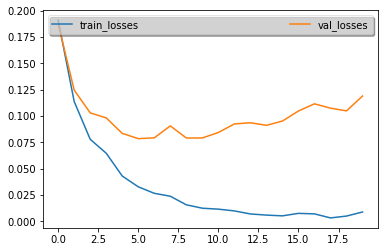

In [14]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
plt.plot(range(epochs), train_losses, label="train_losses")
plt.plot(range(epochs), val_losses, label="val_losses")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()

In [15]:
test_acc = s.run(acc, {input_X: X_test.reshape([-1, 784]), input_y: y_test})
print("test acc:", test_acc)

test acc: 0.9753
